In [1]:
%load_ext sql

In [2]:
### Database file at --> https://github.com/bbrumm/databasestar/blob/main/sample_databases/sample_db_olympics/sqlite/olympics.db

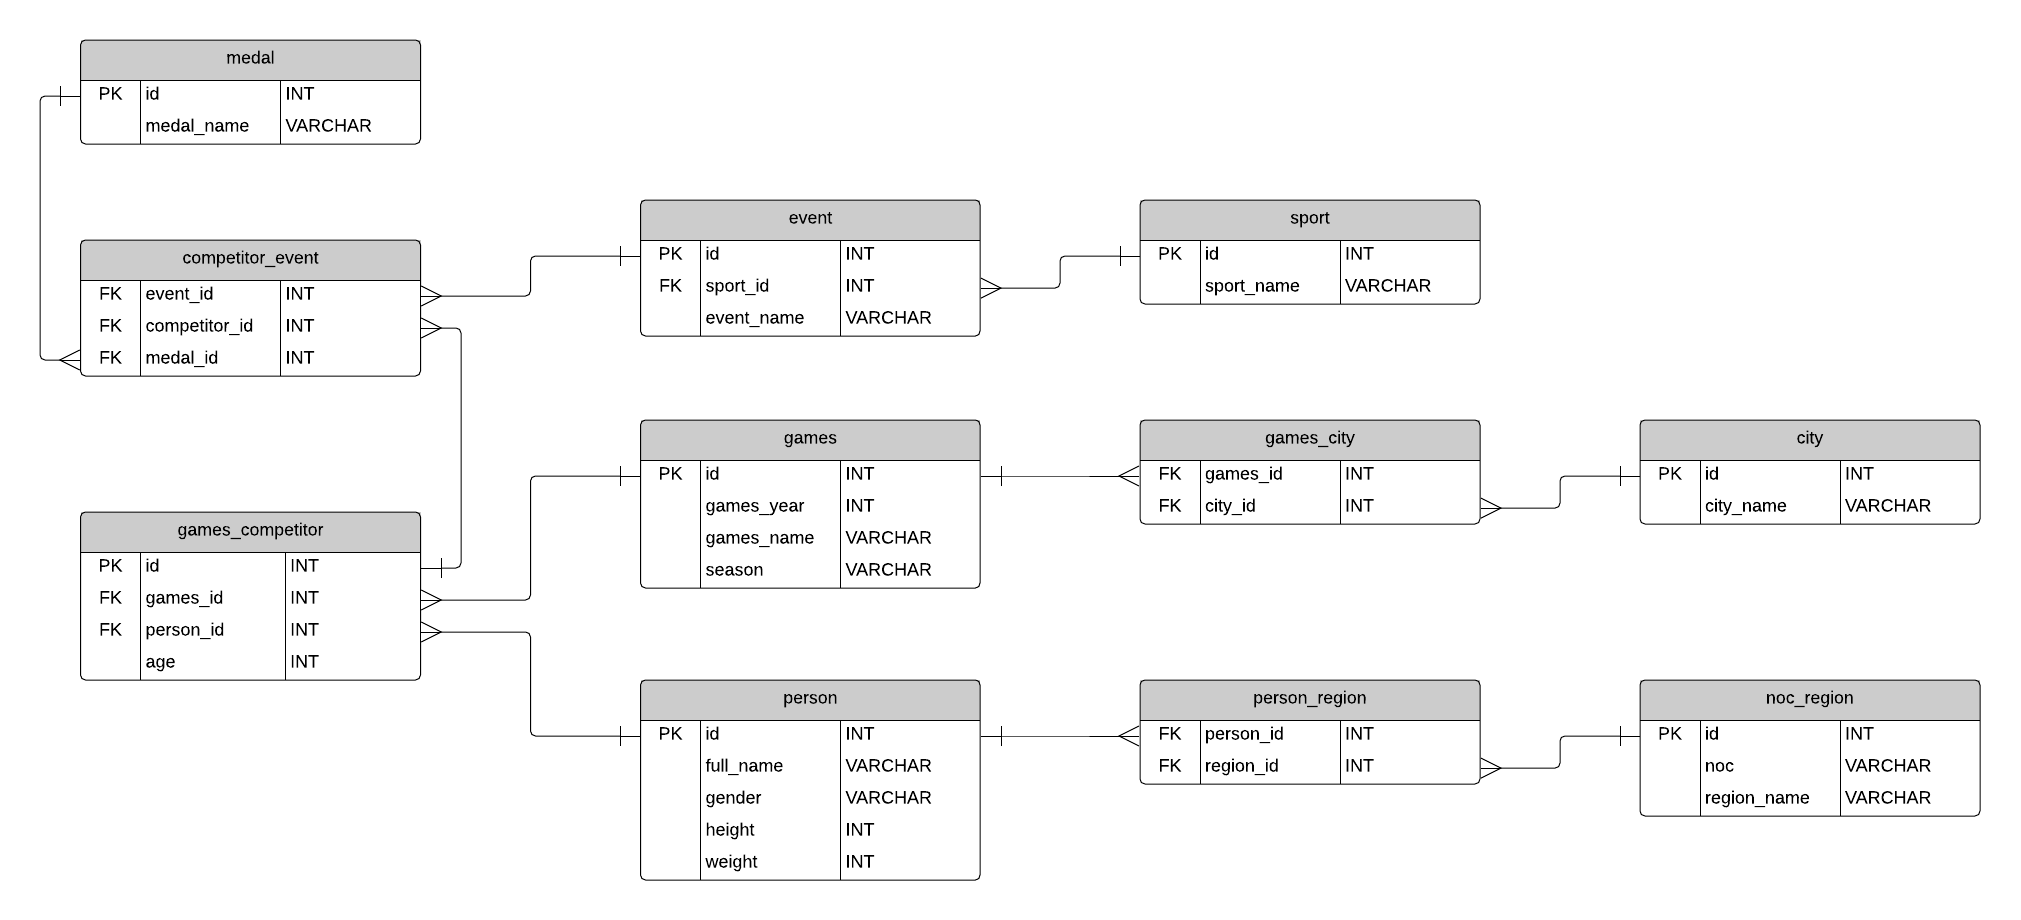

### Show list of games

In [3]:
%%sql
SELECT *
FROM games
ORDER BY games_year ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


id,games_year,games_name,season
51,1896,1896 Summer,Summer
4,1900,1900 Summer,Summer
44,1904,1904 Summer,Summer
45,1906,1906 Summer,Summer
47,1908,1908 Summer,Summer
14,1912,1912 Summer,Summer
3,1920,1920 Summer,Summer
15,1924,1924 Summer,Summer
43,1924,1924 Winter,Winter
35,1928,1928 Summer,Summer


### How many regions participated in each game?

In [4]:
%%sql
SELECT 
    g.games_name AS game_name, 
    COUNT(DISTINCT (nr.id)) AS region_count
FROM games AS g
JOIN games_competitor AS gc
ON g.id=gc.games_id
JOIN person AS p
ON gc.person_id=p.id
JOIN person_region AS pr
ON p.id=pr.person_id
JOIN noc_region AS nr
ON pr.region_id=nr.id
GROUP BY g.id, g.games_name
ORDER BY g.games_year ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


game_name,region_count
1896 Summer,11
1900 Summer,31
1904 Summer,13
1906 Summer,22
1908 Summer,23
1912 Summer,32
1920 Summer,31
1924 Summer,47
1924 Winter,17
1928 Summer,48


### Did any city repeat as host?

In [5]:
%%sql
SELECT
    c.city_name,
    COUNT(c.city_name) AS times_hosted
FROM city AS c
JOIN games_city AS gc
ON c.id=gc.city_id
JOIN games AS g
ON gc.games_id=g.id
GROUP BY c.city_name
ORDER BY times_hosted DESC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


city_name,times_hosted
London,3
Athina,3
Stockholm,2
Sankt Moritz,2
Paris,2
Los Angeles,2
Lake Placid,2
Innsbruck,2
Vancouver,1
Torino,1


### How many sports were played in each game?

In [6]:
%%sql
SELECT 
    g.games_name AS game_name, 
    COUNT(DISTINCT (s.id)) AS sport_count
FROM games AS g
JOIN games_competitor AS gc
ON g.id=gc.games_id
JOIN competitor_event AS ce
ON gc.id=ce.competitor_id
JOIN event AS e
ON ce.event_id=e.id
JOIN sport AS s
ON e.sport_id=s.id
GROUP BY g.id, g.games_name
ORDER BY g.games_year ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


game_name,sport_count
1896 Summer,9
1900 Summer,20
1904 Summer,18
1906 Summer,13
1908 Summer,24
1912 Summer,17
1920 Summer,25
1924 Summer,20
1924 Winter,10
1928 Summer,17


### How many events were there in each game?

In [7]:
%%sql
SELECT 
    g.games_name AS game_name, 
    COUNT(DISTINCT (e.id)) AS event_count
FROM games AS g
JOIN games_competitor AS gc
ON g.id=gc.games_id
JOIN competitor_event AS ce
ON gc.id=ce.competitor_id
JOIN event AS e
ON ce.event_id=e.id
GROUP BY g.id, g.games_name
ORDER BY g.games_year ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


game_name,event_count
1896 Summer,42
1900 Summer,90
1904 Summer,94
1906 Summer,72
1908 Summer,109
1912 Summer,107
1920 Summer,153
1924 Summer,131
1924 Winter,17
1928 Summer,122


### Who are the top 10 oldest athletes to win a gold medal?

In [8]:
%%sql
SELECT DISTINCT
    p.full_name,
    gc.age,
    g.games_name AS game_name
FROM person AS p
JOIN games_competitor AS gc
ON p.id=gc.person_id
JOIN games AS g
ON gc.games_id=g.id
JOIN competitor_event AS ce
ON gc.id=ce.competitor_id
JOIN medal AS m
ON ce.medal_id=m.id
JOIN event AS e
ON ce.event_id=e.id
JOIN sport AS s
ON e.sport_id=s.id
WHERE m.medal_name='Gold'
ORDER BY gc.age DESC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


full_name,age,game_name
Charles Jacobus,64,1904 Summer
Oscar Gomer Swahn,64,1912 Summer
Isaac Lazarus Israls,63,1928 Summer
"Lida Peyton ""Eliza"""" Pollock (McMillen-)""",63,1904 Summer
"Galen Carter ""G. C."""" Spencer""",63,1904 Summer
"Robert W. Williams, Jr.",63,1904 Summer
Joshua Kearney Millner,60,1908 Summer
Oscar Gomer Swahn,60,1908 Summer
Walter Winans,60,1912 Summer
Everard Coenraad Endt,59,1952 Summer


### Who is the oldest winner in each sport?

In [9]:
%%sql
SELECT
    p.full_name,
    gc.age,
    g.games_name AS game_name,
    s.sport_name
FROM person AS p
JOIN games_competitor AS gc
ON p.id=gc.person_id
JOIN games AS g
ON gc.games_id=g.id
JOIN competitor_event AS ce
ON gc.id=ce.competitor_id
JOIN medal AS m
ON ce.medal_id=m.id
JOIN event AS e
ON ce.event_id=e.id
JOIN sport AS s
ON e.sport_id=s.id
WHERE m.medal_name='Gold'
GROUP BY s.id,s.sport_name
ORDER BY MAX(gc.age) DESC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


full_name,age,game_name,sport_name
Charles Jacobus,64,1904 Summer,Roque
Oscar Gomer Swahn,64,1912 Summer,Shooting
"Lida Peyton ""Eliza"""" Pollock (McMillen-)""",63,1904 Summer,Archery
Isaac Lazarus Israls,63,1928 Summer,Art Competitions
Everard Coenraad Endt,59,1952 Summer,Sailing
Chrtien Andr Waydelich,58,1900 Summer,Croquet
"Nicholas David ""Nick"""" Skelton""",58,2016 Summer,Equestrianism
Charles Granville Bruce,57,1924 Winter,Alpinism
Robin Welsh,54,1924 Winter,Curling
Aladr Gerevich (-Gerei),50,1960 Summer,Fencing


### Who is the oldest winner in each event?

In [10]:
%%sql
SELECT
    p.full_name,
    gc.age,
    g.games_name AS game_name,
    e.event_name
FROM person AS p
JOIN games_competitor AS gc
ON p.id=gc.person_id
JOIN games AS g
ON gc.games_id=g.id
JOIN competitor_event AS ce
ON gc.id=ce.competitor_id
JOIN medal AS m
ON ce.medal_id=m.id
JOIN event AS e
ON ce.event_id=e.id
JOIN sport AS s
ON e.sport_id=s.id
WHERE m.medal_name='Gold'
GROUP BY e.id, e.event_name
ORDER BY MAX(gc.age) DESC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


full_name,age,game_name,event_name
Oscar Gomer Swahn,64,1912 Summer,"Shooting Men's Running Target, Single Shot, Team"
Charles Jacobus,64,1904 Summer,Roque Men's Singles
Isaac Lazarus Israls,63,1928 Summer,"Art Competitions Mixed Painting, Paintings"
"Galen Carter ""G. C."""" Spencer""",63,1904 Summer,Archery Men's Team Round
"Lida Peyton ""Eliza"""" Pollock (McMillen-)""",63,1904 Summer,Archery Women's Team Round
Oscar Gomer Swahn,60,1908 Summer,"Shooting Men's Running Target, Single Shot"
Walter Winans,60,1912 Summer,Art Competitions Mixed Sculpturing
Joshua Kearney Millner,60,1908 Summer,"Shooting Men's Free Rifle, 1,000 Yards"
Everard Coenraad Endt,59,1952 Summer,Sailing Mixed 6 metres
"William Herbert ""Bill"""" Northam""",59,1964 Summer,Sailing Mixed 5.5 metres


### Who are the top 10 youngest athletes to win a gold medal?

In [11]:
%%sql
SELECT DISTINCT
    p.full_name,
    gc.age,
    g.games_name AS game_name
FROM person AS p
JOIN games_competitor AS gc
ON p.id=gc.person_id
JOIN games AS g
ON gc.games_id=g.id
JOIN competitor_event AS ce
ON gc.id=ce.competitor_id
JOIN medal AS m
ON ce.medal_id=m.id
JOIN event AS e
ON ce.event_id=e.id
JOIN sport AS s
ON e.sport_id=s.id
WHERE m.medal_name='Gold'
ORDER BY gc.age ASC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


full_name,age,game_name
Hans Bourquin,13,1928 Summer
Donna Elizabeth de Varona (-Pinto),13,1960 Summer
Fu Mingxia,13,1992 Summer
Marjorie Gestring (-Redlick),13,1936 Summer
Kim Yun-Mi,13,1994 Winter
Aileen Muriel Riggin (-Soule),13,1920 Summer
Klaus Zerta,13,1960 Summer
Amanda Ray Beard (-Brown),14,1996 Summer
Giorgio Cesana,14,1906 Summer
Nadia Elena Comneci (-Conner),14,1976 Summer


### Who is the youngest winner in each sport?

In [12]:
%%sql
SELECT
    p.full_name,
    gc.age,
    g.games_name AS game_name,
    s.sport_name
FROM person AS p
JOIN games_competitor AS gc
ON p.id=gc.person_id
JOIN games AS g
ON gc.games_id=g.id
JOIN competitor_event AS ce
ON gc.id=ce.competitor_id
JOIN medal AS m
ON ce.medal_id=m.id
JOIN event AS e
ON ce.event_id=e.id
JOIN sport AS s
ON e.sport_id=s.id
WHERE m.medal_name='Gold'
GROUP BY s.id, s.sport_name
ORDER BY MIN(gc.age) ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


full_name,age,game_name,sport_name
Fu Mingxia,13,1992 Summer,Diving
Hans Bourquin,13,1928 Summer,Rowing
Kim Yun-Mi,13,1994 Winter,Short Track Speed Skating
Donna Elizabeth de Varona (-Pinto),13,1960 Summer,Swimming
Nadia Elena Comneci (-Conner),14,1976 Summer,Gymnastics
"Franciscus Fidelio Joseph ""Frans"""" Hin""",14,1920 Summer,Sailing
Barbara Pearl Jones (-Slater),15,1952 Summer,Athletics
Gaston Achille Louis Aumoitte,15,1900 Summer,Croquet
"Sonja Henie (-Topping, -Gardiner, -Onstad)",15,1928 Winter,Figure Skating
Nuria Cabanillas Provencio,15,1996 Summer,Rhythmic Gymnastics


### Who is the youngest winner in each event?

In [13]:
%%sql
SELECT
    p.full_name,
    gc.age,
    g.games_name AS game_name,
    e.event_name
FROM person AS p
JOIN games_competitor AS gc
ON p.id=gc.person_id
JOIN games AS g
ON gc.games_id=g.id
JOIN competitor_event AS ce
ON gc.id=ce.competitor_id
JOIN medal AS m
ON ce.medal_id=m.id
JOIN event AS e
ON ce.event_id=e.id
JOIN sport AS s
ON e.sport_id=s.id
WHERE m.medal_name='Gold'
GROUP BY e.id, e.event_name
ORDER BY MIN(gc.age) ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


full_name,age,game_name,event_name
Hans Bourquin,13,1928 Summer,Rowing Men's Coxed Pairs
Fu Mingxia,13,1992 Summer,Diving Women's Platform
Marjorie Gestring (-Redlick),13,1936 Summer,Diving Women's Springboard
Donna Elizabeth de Varona (-Pinto),13,1960 Summer,Swimming Women's 4 x 100 metres Freestyle Relay
Kim Yun-Mi,13,1994 Winter,"Short Track Speed Skating Women's 3,000 metres Relay"
Gunther Tiersch,14,1968 Summer,Rowing Men's Coxed Eights
Krisztina Egerszegi,14,1988 Summer,Swimming Women's 200 metres Backstroke
Amanda Ray Beard (-Brown),14,1996 Summer,Swimming Women's 4 x 100 metres Medley Relay
Giorgio Cesana,14,1906 Summer,Rowing Men's Coxed Fours
Nadia Elena Comneci (-Conner),14,1976 Summer,Gymnastics Women's Individual All-Around


### Historic Male/Female ratio

In [14]:
%%sql
SELECT 
    ROUND(SUM(CASE WHEN gender='M' THEN 1 ELSE 0 END)*100/COUNT(*),4) AS male_ratio,
    ROUND(SUM(CASE WHEN gender='F' THEN 1 ELSE 0 END)*100/COUNT(*),4) AS female_ratio
FROM person;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


male_ratio,female_ratio
73.0,26.0


### Male/Female ratio per game

In [15]:
%%sql
SELECT 
    g.games_name AS game_name,
    ROUND(SUM(CASE WHEN p.gender='M' THEN 1 ELSE 0 END)*100/COUNT(*),4) AS male_ratio,
    ROUND(SUM(CASE WHEN p.gender='F' THEN 1 ELSE 0 END)*100/COUNT(*),4) AS female_ratio
FROM person AS p
JOIN games_competitor AS gc
ON p.id=gc.person_id
JOIN games AS g
ON gc.games_id=g.id
GROUP BY g.games_name
ORDER BY g.games_year ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


game_name,male_ratio,female_ratio
1896 Summer,100.0,0.0
1900 Summer,97.0,2.0
1904 Summer,98.0,1.0
1906 Summer,99.0,0.0
1908 Summer,97.0,2.0
1912 Summer,97.0,2.0
1920 Summer,96.0,3.0
1924 Summer,95.0,4.0
1924 Winter,95.0,4.0
1928 Summer,90.0,9.0


### Top 10 competitors with most medals

In [16]:
%%sql 
SELECT 
        p.full_name, 
        SUM(m.medal_name='Gold') AS gold_medals, 
        SUM(m.medal_name='Silver') AS silver_medals, 
        SUM(m.medal_name='Bronze') AS bronze_medals,
        COUNT(*) AS total_medals
FROM person AS p
INNER JOIN games_competitor AS gc
ON p.id=gc.person_id
INNER JOIN competitor_event AS ce
ON ce.competitor_id=gc.id
INNER JOIN medal AS m
ON m.id=ce.medal_id
WHERE m.medal_name IN ('Gold','Silver','Bronze')
GROUP BY p.id, p.full_name
ORDER BY COUNT(*) DESC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


full_name,gold_medals,silver_medals,bronze_medals,total_medals
"Michael Fred Phelps, II",23,3,2,28
Larysa Semenivna Latynina (Diriy-),9,5,4,18
Nikolay Yefimovich Andrianov,7,5,3,15
Ole Einar Bjrndalen,8,4,1,13
Edoardo Mangiarotti,6,5,2,13
Takashi Ono,5,4,4,13
Borys Anfiyanovych Shakhlin,7,4,2,13
Natalie Anne Coughlin (-Hall),3,4,5,12
Birgit Fischer-Schmidt,8,4,0,12
Sawao Kato,8,3,1,12


### Top 10 regions with most medals

In [17]:
%%sql 
SELECT  
        nr.region_name,
        SUM(m.medal_name='Gold') AS gold_medals, 
        SUM(m.medal_name='Silver') AS silver_medals, 
        SUM(m.medal_name='Bronze') AS bronze_medals,
        COUNT(*) AS total_medals
FROM noc_region AS nr
INNER JOIN person_region AS pr
ON pr.region_id=nr.id
INNER JOIN person AS p
ON p.id=pr.person_id
INNER JOIN games_competitor AS gc
ON p.id=gc.person_id
INNER JOIN competitor_event AS ce
ON ce.competitor_id=gc.id
INNER JOIN medal AS m
ON m.id=ce.medal_id
WHERE m.medal_name IN ('Gold','Silver','Bronze')
GROUP BY nr.id, nr.region_name
ORDER BY COUNT(*) DESC
LIMIT 10;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


region_name,gold_medals,silver_medals,bronze_medals,total_medals
USA,2533,1580,1301,5414
Soviet Union,1135,783,740,2658
Germany,843,742,810,2395
UK,658,687,626,1971
France,492,563,631,1686
Italy,568,528,507,1603
Sweden,477,522,536,1535
Australia,348,459,526,1333
Canada,461,430,433,1324
Russia,466,409,446,1321


### Athlete with most medals in top 3 in each sport

In [18]:
%%sql 
SELECT 
    sport_name,
    full_name,
    MAX(total_medals) AS total_medals,
    gold_medals,
    silver_medals,
    bronze_medals
FROM(
    SELECT 
            p.full_name,
            s.sport_name,
            s.id AS sport_id,
            SUM(m.medal_name='Gold') AS gold_medals, 
            SUM(m.medal_name='Silver') AS silver_medals, 
            SUM(m.medal_name='Bronze') AS bronze_medals,
            COUNT(*) AS total_medals
    FROM person AS p
    INNER JOIN games_competitor AS gc
    ON p.id=gc.person_id
    INNER JOIN competitor_event AS ce
    ON ce.competitor_id=gc.id
    INNER JOIN medal AS m
    ON m.id=ce.medal_id
    INNER JOIN event AS e
    ON ce.event_id=e.id
    INNER JOIN sport AS s
    ON e.sport_id=s.id
    WHERE m.medal_name IN ('Gold','Silver','Bronze')
    GROUP BY p.id, p.full_name, sport_id, sport_name)
GROUP BY sport_id, sport_name;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


sport_name,full_name,total_medals,gold_medals,silver_medals,bronze_medals
Aeronautics,Hermann Schreiber,1,1,0,0
Alpine Skiing,Kjetil Andr Aamodt,8,4,2,2
Alpinism,Charles Granville Bruce,1,1,0,0
Archery,Gerard Theodor Hubert Van Innis,10,6,4,0
Art Competitions,Alex Walter Diggelmann,3,1,1,1
Athletics,Paavo Johannes Nurmi,12,9,3,0
Badminton,Gao Ling,4,2,1,1
Baseball,Pedro Luis Lazo Iglesias,4,2,2,0
Basketball,Teresa Edwards,5,4,0,1
Basque Pelota,Jos de Amzola y Aspiza,1,1,0,0


### Region with most medals in top 3 for each sport

In [19]:
%%sql
SELECT
    sport_name,
    region_name,
    MAX(total_medals) AS total_medals,
    gold_medals,
    silver_medals,
    bronze_medals
FROM (
    SELECT  
            s.sport_name,
            nr.region_name,
            s.id AS sport_id,
            SUM(m.medal_name='Gold') AS gold_medals, 
            SUM(m.medal_name='Silver') AS silver_medals, 
            SUM(m.medal_name='Bronze') AS bronze_medals,
            COUNT(*) AS total_medals
    FROM noc_region AS nr
    INNER JOIN person_region AS pr
    ON nr.id=pr.region_id
    INNER JOIN person AS p
    ON pr.person_id=p.id
    INNER JOIN games_competitor AS gc
    ON p.id=gc.person_id
    INNER JOIN competitor_event AS ce
    ON gc.id=ce.competitor_id
    INNER JOIN event AS e
    ON ce.event_id=e.id
    INNER JOIN sport AS s
    ON e.sport_id=s.id
    INNER JOIN medal AS m
    ON ce.medal_id=m.id
    WHERE m.medal_name IN ('Gold','Silver','Bronze')
    GROUP BY nr.id, nr.region_name, sport_id, sport_name)
GROUP BY sport_id, sport_name;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


sport_name,region_name,total_medals,gold_medals,silver_medals,bronze_medals
Aeronautics,Switzerland,1,1,0,0
Alpine Skiing,Austria,114,34,39,41
Alpinism,UK,11,11,0,0
Archery,South Korea,69,49,11,9
Art Competitions,Germany,26,9,8,9
Athletics,USA,1035,516,305,214
Badminton,China,64,28,13,23
Baseball,Cuba,112,64,48,0
Basketball,USA,331,274,24,33
Basque Pelota,Spain,2,2,0,0


### Athlete with most medals in top 3 in each event

In [20]:
%%sql 
SELECT 
    event_name,
    full_name,
    MAX(total_medals) AS total_medals,
    gold_medals,
    silver_medals,
    bronze_medals
FROM(
    SELECT 
            p.full_name,
            e.event_name,
            e.id AS event_id,
            SUM(m.medal_name='Gold') AS gold_medals, 
            SUM(m.medal_name='Silver') AS silver_medals, 
            SUM(m.medal_name='Bronze') AS bronze_medals,
            COUNT(*) AS total_medals
    FROM person AS p
    INNER JOIN games_competitor AS gc
    ON p.id=gc.person_id
    INNER JOIN competitor_event AS ce
    ON ce.competitor_id=gc.id
    INNER JOIN medal AS m
    ON m.id=ce.medal_id
    INNER JOIN event AS e
    ON ce.event_id=e.id
    WHERE m.medal_name IN ('Gold','Silver','Bronze')
    GROUP BY p.id, p.full_name, event_id, event_name)
GROUP BY event_id, event_name;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


event_name,full_name,total_medals,gold_medals,silver_medals,bronze_medals
Basketball Men's Basketball,Carmelo Kyan Anthony,4,3,0,1
Judo Men's Extra-Lightweight,Tadahiro Nomura,3,3,0,0
Football Men's Football,Charles von Buchwald,3,1,2,0
Tug-Of-War Men's Tug-Of-War,Frederick Harkness Humphreys,3,2,1,0
Speed Skating Women's 500 metres,Bonnie Kathleen Blair (-Cruikshank),3,3,0,0
"Speed Skating Women's 1,000 metres",Bonnie Kathleen Blair (-Cruikshank),3,2,0,1
Cross Country Skiing Men's 10 kilometres,Marco Albarello,2,0,1,1
Cross Country Skiing Men's 50 kilometres,Veikko Johannes Hakulinen,3,1,2,0
Cross Country Skiing Men's 10/15 kilometres Pursuit,Vladimir Mikhaylovich Smirnov,2,0,1,1
Cross Country Skiing Men's 4 x 10 kilometres Relay,Harri Tapani Kirvesniemi,5,0,0,5


### Region with most medals in each event

In [21]:
%%sql
SELECT
    event_name,
    region_name,
    MAX(total_medals) AS total_medals,
    gold_medals,
    silver_medals,
    bronze_medals
FROM (
    SELECT
            nr.region_name,
            e.event_name,
            e.id AS event_id,
            SUM(m.medal_name='Gold') AS gold_medals, 
            SUM(m.medal_name='Silver') AS silver_medals, 
            SUM(m.medal_name='Bronze') AS bronze_medals,
            COUNT(*) AS total_medals
    FROM noc_region AS nr
    INNER JOIN person_region AS pr
    ON nr.id=pr.region_id
    INNER JOIN person AS p
    ON pr.person_id=p.id
    INNER JOIN games_competitor AS gc
    ON p.id=gc.person_id
    INNER JOIN competitor_event AS ce
    ON gc.id=ce.competitor_id
    INNER JOIN event AS e
    ON ce.event_id=e.id
    INNER JOIN medal AS m
    ON ce.medal_id=m.id
    WHERE m.medal_name IN ('Gold','Silver','Bronze')
    GROUP BY nr.id, nr.region_name, event_id, event_name)
GROUP BY event_id, event_name;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


event_name,region_name,total_medals,gold_medals,silver_medals,bronze_medals
Basketball Men's Basketball,USA,212,179,12,21
Judo Men's Extra-Lightweight,Japan,8,4,1,3
Football Men's Football,Brazil,101,17,50,34
Tug-Of-War Men's Tug-Of-War,UK,37,15,14,8
Speed Skating Women's 500 metres,Soviet Union,10,2,3,5
"Speed Skating Women's 1,000 metres",USA,11,3,3,5
Cross Country Skiing Men's 10 kilometres,Italy,2,0,1,1
Cross Country Skiing Men's 50 kilometres,Sweden,18,7,6,5
Cross Country Skiing Men's 10/15 kilometres Pursuit,Unified Team,2,0,1,1
Cross Country Skiing Men's 4 x 10 kilometres Relay,Finland,52,16,12,24


### Athlete with most medals in each game

In [22]:
%%sql 
SELECT 
    games_name AS game_name,
    full_name,
    MAX(total_medals) AS total_medals,
    gold_medals,
    silver_medals,
    bronze_medals
FROM(
    SELECT 
            p.full_name,
            g.games_name,
            g.games_year,
            g.id AS game_id,
            SUM(m.medal_name='Gold') AS gold_medals, 
            SUM(m.medal_name='Silver') AS silver_medals, 
            SUM(m.medal_name='Bronze') AS bronze_medals,
            COUNT(*) AS total_medals
    FROM person AS p
    INNER JOIN games_competitor AS gc
    ON p.id=gc.person_id
    INNER JOIN competitor_event AS ce
    ON ce.competitor_id=gc.id
    INNER JOIN medal AS m
    ON m.id=ce.medal_id
    INNER JOIN games AS g
    ON gc.games_id=g.id
    WHERE m.medal_name IN ('Gold','Silver','Bronze')
    GROUP BY p.id, p.full_name,game_id, games_name)
GROUP BY game_id, games_name
ORDER BY games_year ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


game_name,full_name,total_medals,gold_medals,silver_medals,bronze_medals
1896 Summer,Hermann Otto Ludwig Weingrtner,6,3,2,1
1900 Summer,"Irving Knott ""Irv"""" Baxter""",5,2,3,0
1904 Summer,Burton Cecil Downing,6,2,3,1
1906 Summer,Lon Ernest Moreaux,5,2,1,2
1908 Summer,"Benjamin ""Ben"""" Jones""",3,2,1,0
1912 Summer,Gustaf Vilhelm Carlberg,5,3,2,0
1920 Summer,"Willis Augustus Lee, Jr.",7,5,1,1
1924 Summer,"Viljo Eino ""Ville"""" Ritola (Koukkari-)""",6,4,2,0
1924 Winter,Roald Morel Larsen,5,0,2,3
1928 Summer,Hermann Hnggi,4,2,1,1


### Region with most medals in each game

In [23]:
%%sql
SELECT
    games_name AS game_name,
    region_name,
    MAX(total_medals) AS total_medals,
    gold_medals,
    silver_medals,
    bronze_medals
FROM (
    SELECT  
            nr.region_name,
            g.games_name,
            g.games_year,
            g.id AS game_id,
            SUM(m.medal_name='Gold') AS gold_medals, 
            SUM(m.medal_name='Silver') AS silver_medals, 
            SUM(m.medal_name='Bronze') AS bronze_medals,
            COUNT(*) AS total_medals
    FROM noc_region AS nr
    INNER JOIN person_region AS pr
    ON nr.id=pr.region_id
    INNER JOIN person AS p
    ON pr.person_id=p.id
    INNER JOIN games_competitor AS gc
    ON p.id=gc.person_id
    INNER JOIN competitor_event AS ce
    ON gc.id=ce.competitor_id
    INNER JOIN games AS g
    ON gc.games_id=g.id
    INNER JOIN medal AS m
    ON ce.medal_id=m.id
    WHERE m.medal_name IN ('Gold','Silver','Bronze')
    GROUP BY nr.id, nr.region_name, game_id, games_name)
GROUP BY game_id, games_name
ORDER BY games_year ASC;

 * sqlite:////Users/loren/Documents/SQLFiles/Olympic_Games/olympics.db
Done.


game_name,region_name,total_medals,gold_medals,silver_medals,bronze_medals
1896 Summer,Germany,30,23,5,2
1900 Summer,France,168,45,70,53
1904 Summer,USA,348,115,119,114
1906 Summer,France,53,18,12,23
1908 Summer,UK,316,138,102,76
1912 Summer,Sweden,190,103,62,25
1920 Summer,USA,188,106,45,37
1924 Summer,USA,175,92,35,48
1924 Winter,UK,30,15,4,11
1928 Summer,USA,85,46,23,16
